**Import Libraries** 

In [3]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import numpy as np

**Importing dataset**


In [4]:
# Load the data
try:
    data = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Could not find the input file. Please check the file path and try again.")
    exit()

**Transformation**

In [5]:
data.head()

,device_name,min_consumption,max_consumption,device_age
0,bulb,100.0,120.0,3
1,LED TV 42 INCH,58.0,60.0,5
2,3''belt sander,1000.0,1000.0,4
3,Air cooler,65.0,80.0,4
4,Air purifier,25.0,30.0,3


In [6]:
min_c = data['min_consumption'].values
max_c = data['max_consumption'].values
random_consumption = [rd.uniform(min_c[i], max_c[i]) for i in range(len(min_c))]
working_hours = []
for i in range(len(min_c)):
    random_hours = rd.randint(0,24)
    working_hours.append(random_hours)
data['input_power'] = random_consumption
data['working_hours'] = working_hours
output_power = []
for i in range(len(min_c)):
    output_power.append(rd.uniform(random_consumption[i] * 0.70 , random_consumption[i]))
    output_power[i] = output_power[i]
data['output_power'] = output_power 
data.head()

,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power
0,bulb,100.0,120.0,3,110.278971,3,102.414741
1,LED TV 42 INCH,58.0,60.0,5,58.411179,10,45.231023
2,3''belt sander,1000.0,1000.0,4,1000.000000,21,719.839414
3,Air cooler,65.0,80.0,4,72.181550,15,68.427377
4,Air purifier,25.0,30.0,3,29.886178,10,27.743348


In [7]:
Enhanced_efficiency = []
for i in range(len(min_c)):
    Enhanced_efficiency.append(output_power[i]/random_consumption[i]*100)
data['Enhanced_efficiency'] = Enhanced_efficiency
efficiency = data['output_power']/data['min_consumption']*100
data['efficiency'] = efficiency
data.head()


,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency
0,bulb,100.0,120.0,3,110.278971,3,102.414741,92.868785,102.414741
1,LED TV 42 INCH,58.0,60.0,5,58.411179,10,45.231023,77.435559,77.984522
2,3''belt sander,1000.0,1000.0,4,1000.000000,21,719.839414,71.983941,71.983941
3,Air cooler,65.0,80.0,4,72.181550,15,68.427377,94.798986,105.272888
4,Air purifier,25.0,30.0,3,29.886178,10,27.743348,92.830030,110.973390


In [8]:
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data.head()

,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency
0,bulb,100.0,120.0,3,110.278971,3,102.414741,92.868785,102.414741
1,LED TV 42 INCH,58.0,60.0,5,58.411179,10,45.231023,77.435559,77.984522
2,3''belt sander,1000.0,1000.0,4,1000.000000,21,719.839414,71.983941,71.983941
3,Air cooler,65.0,80.0,4,72.181550,15,68.427377,94.798986,105.272888
4,Air purifier,25.0,30.0,3,29.886178,10,27.743348,92.830030,110.973390


In [9]:
#organize the data
List_efficiency = data['efficiency'].values
List_enhan_efficiency = data['Enhanced_efficiency'].values

for i in range(len(List_efficiency)):
    # if enhance efficiency is greater than enhance efficiency then minus abs value for efficiency
    if List_enhan_efficiency[i] > List_efficiency[i]:
        List_efficiency[i] = List_efficiency[i] - abs(List_enhan_efficiency[i] - List_efficiency[i])
    # if enhance efficiency is less than enhance efficiency then plus abs value for efficiency
    elif List_enhan_efficiency[i] < List_efficiency[i]:
        List_efficiency[i] = List_efficiency[i] + abs(List_enhan_efficiency[i] - List_efficiency[i])
    # if enhance efficiency is equal to enhance efficiency then plus abs value for efficiency
    else:
        List_efficiency[i] = List_efficiency[i] + abs(List_enhan_efficiency[i] - List_efficiency[i])
data['efficiency'] = List_efficiency
data.head()



,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency
0,bulb,100.0,120.0,3,110.278971,3,102.414741,92.868785,111.960696
1,LED TV 42 INCH,58.0,60.0,5,58.411179,10,45.231023,77.435559,78.533485
2,3''belt sander,1000.0,1000.0,4,1000.000000,21,719.839414,71.983941,71.983941
3,Air cooler,65.0,80.0,4,72.181550,15,68.427377,94.798986,115.746791
4,Air purifier,25.0,30.0,3,29.886178,10,27.743348,92.830030,129.116750


In [10]:
features = ['min_consumption', 'max_consumption']
X = data[features]
y = data['efficiency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
normal_prediction = GradientBoostingRegressor(random_state=1)
normal_prediction.fit(X_train, y_train)
predictions = normal_prediction.predict(X_test)
print(predictions)


[ 93.19612268  94.57084243 101.01980183 108.82681784  95.98213722
 115.0563471  101.53114031 383.63630424 107.40941634 108.82681784
  95.43803383  94.05768782 108.41988646 267.26247115 102.39564149
 118.19934434 204.04272306 108.41988646 111.92086362 103.14953729
 105.55284737 223.78127245 134.64604635 127.98062732 200.68857351
 107.14545178 122.00783956  94.57084243 104.79296813 278.88450756
 168.87843405 102.39564149 102.39564149 102.39564149  96.25138224
 106.14133543 109.83380742 288.49147016 283.87365924 102.36656532
 110.73392865 113.04729826 155.43321632 110.73392865 240.15093473
 112.19100478  93.31458128 115.0563471  120.57320774 103.31694804
 263.07672614  95.43803383  97.46417044 112.19100478 121.48056817
  92.57237149 102.36656532 108.82681784 102.39564149 206.97939384]


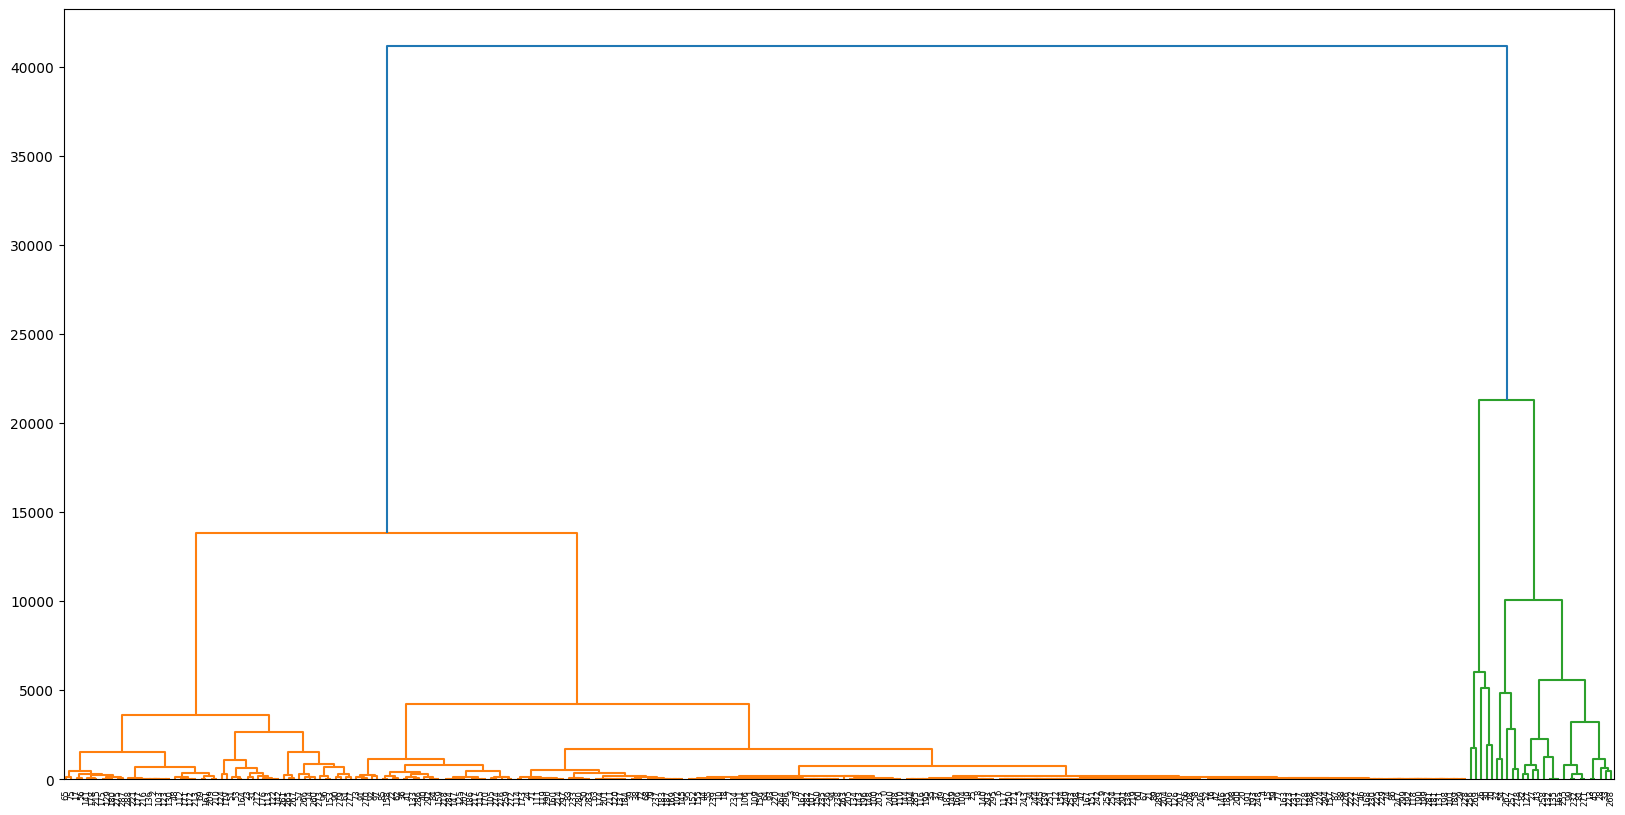

In [11]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
mergings = linkage(X, method='ward')
plt.figure(figsize=(20, 10))
dendrogram = dendrogram(mergings,
            labels=X.index,
            leaf_rotation=90,
            leaf_font_size=6,
)
plt.show()


In [12]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)
data['cluster'] = cluster.labels_
data.head()

[4 4 3 4 4 4 4 4 4 4 4 4 4 2 3 4 4 3 4 4 4 4 4 3 4 4 0 6 2 4 0 3 1 2 4 4 4
 4 4 4 4 4 4 6 4 2 4 4 3 4 4 3 4 3 1 4 3 3 4 4 4 3 4 4 4 3 4 4 4 3 0 4 4 4
 4 3 4 4 4 4 2 6 4 4 4 4 4 4 4 3 4 4 4 4 4 3 4 4 2 4 4 4 3 4 4 4 4 4 4 4 4
 3 3 4 4 4 4 4 4 4 4 3 3 3 4 4 6 4 3 3 4 6 4 4 6 3 4 4 4 4 3 3 4 4 4 4 4 4
 4 4 4 4 3 4 4 4 4 4 4 4 3 4 4 3 6 4 4 4 4 4 3 3 4 4 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 4 3 3 4 3 3 4 4 4 4 3 4
 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 5 1 6 4
 3 3 1 4 4 3 3 3 2 5 4 2 4 3 4 3 4 3 1 3 4 4 4 4 4 4 4 3 3 4 4 4 4 4 4 4 4
 4 4 4]


/home/xer0bit/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency,cluster
0,bulb,100.0,120.0,3,110.278971,3,102.414741,92.868785,111.960696,4
1,LED TV 42 INCH,58.0,60.0,5,58.411179,10,45.231023,77.435559,78.533485,4
2,3''belt sander,1000.0,1000.0,4,1000.000000,21,719.839414,71.983941,71.983941,3
3,Air cooler,65.0,80.0,4,72.181550,15,68.427377,94.798986,115.746791,4
4,Air purifier,25.0,30.0,3,29.886178,10,27.743348,92.830030,129.116750,4


In [13]:
#fit cluster into model and predict
X = data[features]
y = data['Enhanced_efficiency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
Enhanced = GradientBoostingRegressor(random_state=1)
Enhanced.fit(X_train, y_train)
predictions = Enhanced.predict(X_test)
print(predictions)




[85.2176618  86.06605219 85.67791765 91.44064487 79.66972976 92.64763993
 86.06605219 87.55077414 82.75752047 91.44064487 85.66302078 83.77660291
 83.8412002  90.40537525 82.25257577 85.04482331 89.25683876 83.8412002
 84.07222333 82.66596584 91.63462577 86.48851676 77.31538952 85.15614151
 85.9709922  83.8412002  80.7217721  83.92480777 81.50694883 89.6144523
 84.18277911 82.25257577 80.84867622 80.84867622 91.19451717 84.6217599
 80.18039236 88.52018    88.74649685 87.21362541 80.84047481 79.32746313
 84.00131404 80.84047481 82.45745604 80.90326899 82.79626493 93.88067905
 86.78761707 89.85399483 90.6805807  85.66302078 89.22722436 80.90326899
 86.67676151 85.66302078 88.00795709 80.8374019  80.84867622 83.68197784]


In [14]:
from sklearn.metrics import r2_score
print(r2_score(y_test, predictions))

-0.18381293252041275


In [ ]:
#saving both models
import pickle
pickle.dump(normal_prediction, open('normal_prediction.pkl', 'wb'))
pickle.dump(Enhanced, open('Enhanced.pkl', 'wb'))


In [17]:
def input_function():
    min_consumption = float(input("Enter the minimum consumption: "))
    max_consumption = float(input("Enter the maximum consumption: "))
    return min_consumption, max_consumption

In [18]:
def predict_efficiency(min_consumption, max_consumption):
    normal = normal_prediction.predict([[min_consumption, max_consumption]])
    return efficiency

In [19]:
def predict_enhanced_efficiency(min_consumption, max_consumption):
    enhanced_efficiency = Enhanced.predict([[min_consumption, max_consumption]])
    return enhanced_efficiency

In [20]:
print("Enter the minimum and maximum consumption of the device")
min_consumption, max_consumption = input_function()
efficiency = predict_efficiency(min_consumption, max_consumption)
enhanced_efficiency = predict_enhanced_efficiency(min_consumption, max_consumption)
print("The efficiency of the device is: ", efficiency)
print("The enhanced efficiency of the device is: ", enhanced_efficiency)


Enter the minimum and maximum consumption of the device
The efficiency of the device is:  0       98.048720
1       91.005482
2       86.118236
3      103.476742
4      110.492891
          ...    
295    238.293765
296     88.591294
297     77.516703
298    126.548746
299    117.520481
Length: 300, dtype: float64
The enhanced efficiency of the device is:  [87.14529194]


/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
